## Project | Deep Learning: Image Classification with CNN

# Data Preprocessing

In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16



In [17]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [18]:
# Normalize images to [0,1] range
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [19]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, horizontal_flip=True
)
datagen.fit(X_train)


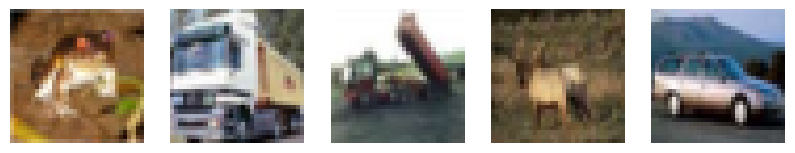

In [20]:
# Visualizing Sample Images

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")
plt.show()


## Model Architecture

In [21]:
# Building the CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define improved CNN model with regularization
model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.3),  # Increased Dropout

    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.4),  # Increased Dropout

    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.5),  # Increased Dropout

    Flatten(),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Increased Dropout
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile model with lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0003),  # Reduced LR
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,352,778 (20.42 MB)

 Trainable params: 5,351,882 (20.42 MB)

 Non-trainable params: 896 (3.50 KB)

##  Model Training

In [22]:
#  Model Training

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Adjust ReduceLROnPlateau for better optimization
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5, verbose=1)

# Train the improved CNN model with a larger batch size
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=50,  # Increased epochs
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.2196 - loss: 4.7182 - val_accuracy: 0.1414 - val_loss: 5.1956 - learning_rate: 3.0000e-04
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.3890 - loss: 3.4315 - val_accuracy: 0.3642 - val_loss: 3.5326 - learning_rate: 3.0000e-04
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.4708 - loss: 2.7809 - val_accuracy: 0.4833 - val_loss: 2.5971 - learning_rate: 3.0000e-04
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.5274 - loss: 2.3245 - val_accuracy: 0.5205 - val_loss: 2.3847 - learning_rate: 3.0000e-04
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 64ms/step - accuracy: 0.5788 - loss: 1.9780 - val_accuracy: 0.5851 - val_loss: 1.9337 - learning_rate: 3.0000e-04
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.6200 - loss: 1.7207 - val_accuracy: 0.5769 - val_loss: 1.7974 - learning_rate: 3.0000e-04
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accurac

In [23]:
model.save("model_5.h5")

##Model Evaluation

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8754 - loss: 0.6244
Improved CNN Model Test Accuracy: 0.8744


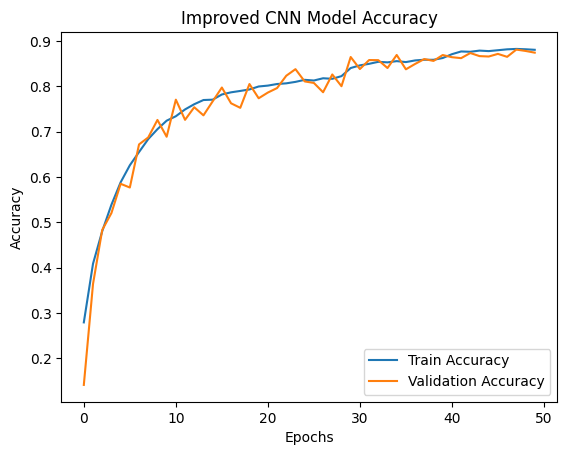

In [24]:
#  Model Evaluation

# Evaluate the improved CNN model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Improved CNN Model Test Accuracy: {test_acc:.4f}")

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Improved CNN Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


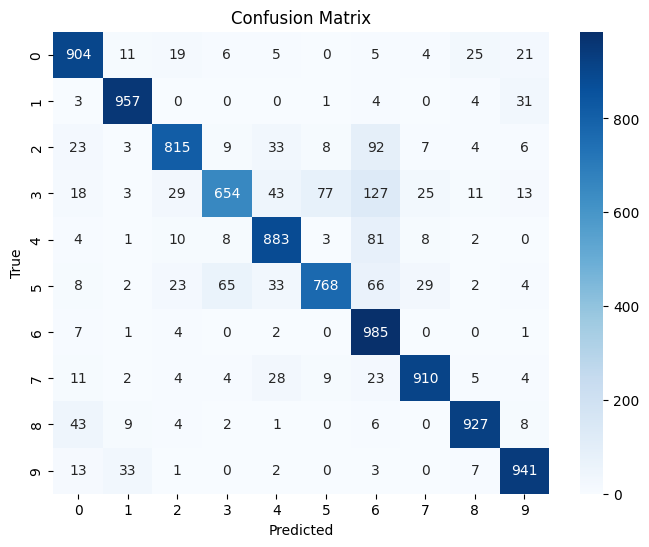

In [25]:
# Confusion Matrix

# Predict labels
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



##Transfer Learning

##improve the model using transfer learning using a pre-trained model VGG16, using PyTorch. We will load the pre-trained VGG16 model and train the new model on the CIFAR-10 dataset.

In [38]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import numpy as np

# 1. Load Pre-trained VGG16 Model
vgg16 = models.vgg16(pretrained=True)

# 2. Freeze Pre-trained Layers
for param in vgg16.parameters():
    param.requires_grad = False

# 3. Modify the Classifier for CIFAR-10 (10 classes)
num_features = vgg16.classifier[6].in_features
vgg16.classifier[6] = nn.Linear(num_features, 10)  # Replace the last layer

# 4. Define Transformations
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images for VGG16 input
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 5. Load CIFAR-10 Dataset
train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 6. Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier[6].parameters(), lr=0.001)  # Only optimize the classifier

# 7. Move Model to GPU (if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16.to(device)

# 8. Training Loop
epochs = 10
for epoch in range(epochs):
    vgg16.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

# 9. Evaluation
vgg16.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = vgg16(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy}%")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 209MB/s]


100%|██████████| 170M/170M [00:02<00:00, 76.9MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1, Loss: 0.6608377549883044
Epoch 2, Loss: 0.59893970119069
Epoch 3, Loss: 0.5948495106852573
Epoch 4, Loss: 0.5958956867037222
Epoch 5, Loss: 0.595031204697726
Epoch 6, Loss: 0.5986728927554072
Epoch 7, Loss: 0.5919223070106543
Epoch 8, Loss: 0.5952577035864601
Epoch 9, Loss: 0.5989928922003798
Epoch 10, Loss: 0.6019265862834423
Accuracy on the test set: 84.2%
